In [1]:
#!pip3 install ipywidgets
#!pip3 install plotly


#functions to import for the parsing 
import time, os
import os.path
from os import path
from bs4 import BeautifulSoup
import requests
import re
import csv
import spacy
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
driver = webdriver.Chrome(executable_path= '/Users/paolaantonicoli/Downloads/chromedriver') #insert the path of the driver

#function to import for the search engine
import langdetect
from langdetect import detect
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.stem import WordNetLemmatizer

import pandas as pd
import pickle
from collections import defaultdict

#functions to import for my score
import numpy as np
import heapq

#functions to import for the plots
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import plotly.express as px
import seaborn as sns
sns.set()

#functions to import for fancy stuff
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


#our functions
import functions as f

import networkx as nx


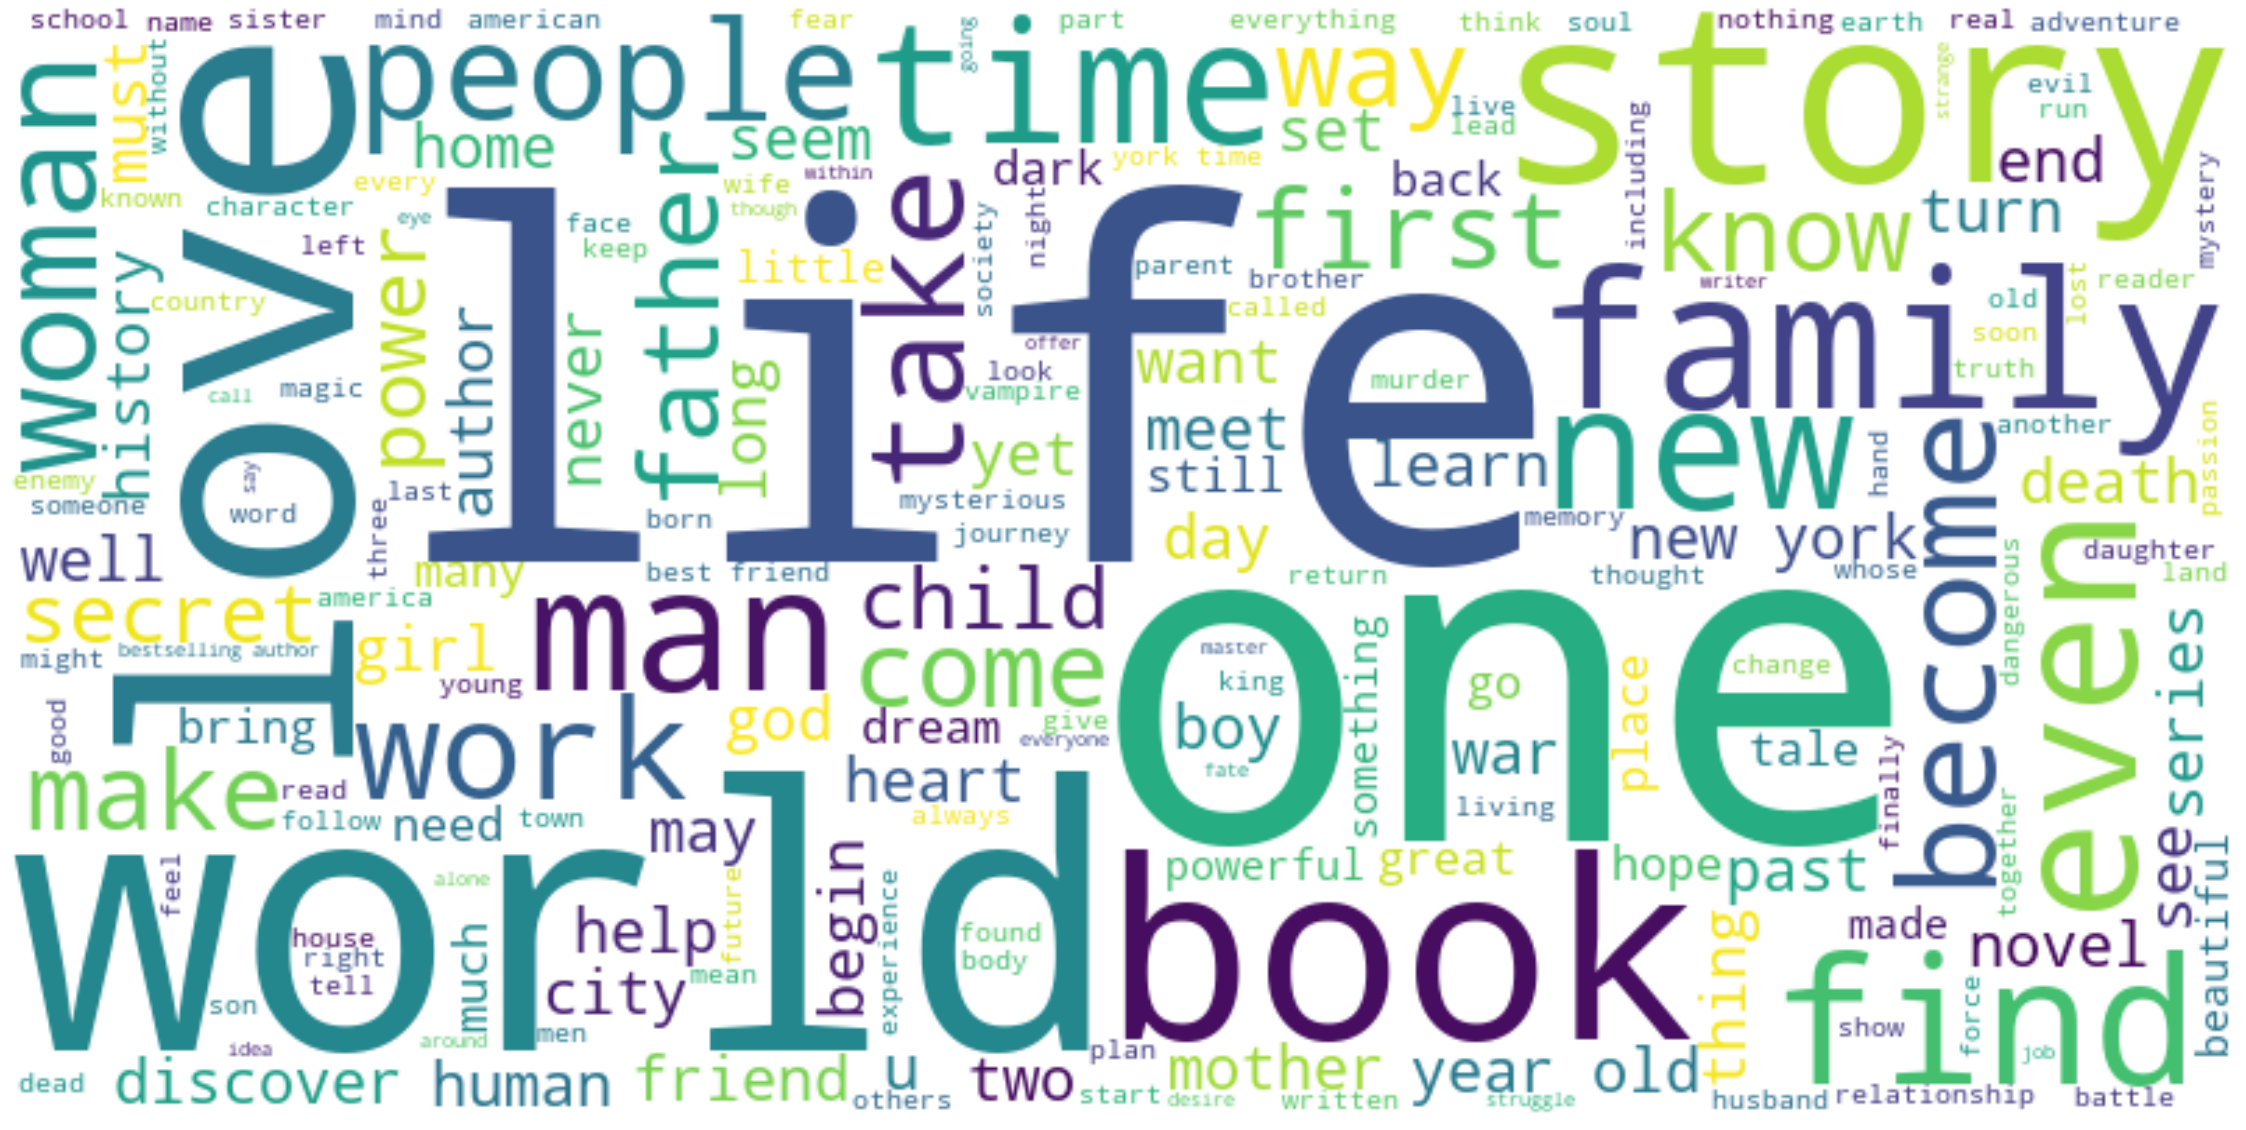

In [6]:
f.welcome()

> # 1. Data Collection


We are asked to create a .txt file in which are reported the first 300 pages of the Best Book Ever leaderboard by Good Reads.

In order to do that we implemented the function <code>write pages</code>, which takes as an input the file path in which we want to save them.


In [1]:
f.write_pages('/Users/paolaantonicoli/Desktop/HW3/URLs_300_BestBookEver.txt')

In order to get all the html pages we used the function <code>download_books_by_page</code>, that takes as input the UTL_txt.txt file created previously and within the folder <code>main_folder</code> returns a folder *page_i* for each page *i* of the Best Book Ever leaderbord. Whithin that, are collected the htmls pages for each book in the page.

In [2]:
URL_txt ='/Users/paolaantonicoli/Desktop/HW3/URLs_300_BestBookEver.txt'
main_folder = '/Users/paolaantonicoli/Desktop/HTML_PAGES_HW3'


f.download_books_by_page(URL_txt,main_folder)

In order to collect the informations by crawling the pages in the .tsv file, we used the function <code>create_tmp</code>
In the Parsing of the pages we also considered the time of first publication, in order to get correct result in the 4th exercise, in which we are required to create a plot of the cumulative number of pages through the year of the serie.

In [3]:
starting page = 0
ending page = 300

for i in range(0,300):
    f.create_tmp('/Users/paolaantonicoli/Desktop/HW3/bbe.tsv','/Users/paolaantonicoli/Downloads/books',i) 


The Dataframe we get in this way is the following.
We resetted the index in order to prevent confusion. Indeed during the parsing of the pages some could be corrupted or in a different language, therefore we had to ignore them.

In [2]:
df = pd.read_csv('/Users/paolaantonicoli/Desktop/HW3/BOOK.tsv',delimiter = '\t')
df['index']=df.index
df

index                                          bookTitle  \
0          0                                   The Hunger Games   
1          1          Harry Potter and the Order of the Phoenix   
2          2                              To Kill a Mockingbird   
3          3                                Pride and Prejudice   
4          4                                           Twilight   
...      ...                                                ...   
25604  25604  The Serial Garden: The Complete Armitage Famil...   
25605  25605                   Jill Kismet: The Complete Series   
25606  25606                      The Art of Always Being Right   
25607  25607                                    A Terrible Love   
25608  25608  10 Sexy Stories Thank You Our Readers Erotica ...   

                  bookSeries          bookAuthors  ratingCount  reviewCount  \
0        The Hunger Games #1      Suzanne Collins      6413038       172609   
1            Harry Potter #5         J.K. Rowling      2527001        42768   
2      To Kill a Mockingbird           Harper Lee      4530814        91864   
3                          -          Jane Austen      3020242        67867   
4       The Twilight Saga #1      Stephenie Meyer      4993049       104949   
...                      ...                  ...          ...          ...   
25604                      -           Joan Aiken          628          119   
25605       Jill Kismet #1-6     Lilith Saintcrow          765           53   
25606                      -  Arthur Schopenhauer         8751          823   
25607     A Terrible Love #1          Marata Eros         3663          401   
25608          Ebony Ecstasy          Candy Young          522           23   

       ratingValue                                               plot  \
0             4.33  Could you survive on your own in the wild, wit...   
1             4.50  There is a door at the end of a silent corrido...   
2             4.28  The unforgettable novel of a childhood in a sl...   
3             4.26  Alternate cover edition of ISBN 9780679783268S...   
4             3.60  About three things I was absolutely positive.F...   
...            ...                                                ...   
25604         4.18  This is the first complete collection of Joan ...   
25605         4.16  Not everyone can take on the things that go bu...   
25606         3.56  Which are the logical tricks that will let you...   
25607         3.78  Jess Mackey is living a meticulously fabricate...   
25608         3.28  The 10 authors in this bundle would like to th...   

       number_of_pages     publication_date first_publication_date  \
0                  374  September 14th 2008    September 14th 2008   
1                  870       September 2004         June 21st 2003   
2                  324        May 23rd 2006         July 11th 1960   
3                  279    October 10th 2000      January 28th 1813   
4                  501   September 6th 2006       October 5th 2005   
...                ...                  ...                    ...   
25604              328     October 1st 2008     September 5th 2008   
25605             1408    January 22nd 2013       January 1st 2013   
25606              138                 2004                   1831   
25607              272   February 11th 2013     February 11th 2013   
25608              136   December 21st 2012     December 21st 2012   

                                              characters  \
0      Katniss Everdeen, Peeta Mellark, Cato (Hunger ...   
1      Sirius Black, Draco Malfoy, Ron Weasley, Petun...   
2      Scout Finch, Atticus Finch, Jem Finch, Arthur ...   
3      Mr. Bennet, Mrs. Bennet, Jane Bennet, Elizabet...   
4      Edward Cullen, Jacob Black, Laurent, Renee, Be...   
...                                                  ...   
25604                    Harriet Armitage, Mark Armitage   
25605                                                Na

Furthermore we applied the function <code>preprocess</code> in order to get a Plot suitable for the serch engine process, stemming*, lowering and removing the stopwords.


\* *actually we consider as a better solution to use* <code>lemmatize</code> *module from* <code>lmtzr</code> *library, in this way the irregular forms are lead back to the main root of the word (go went gone -> go)*


In [8]:
df['plot'] = df.apply(lambda x: f.preprocess(x['plot']),axis = 1)
df

index                                          bookTitle  \
0          0                                   The Hunger Games   
1          1          Harry Potter and the Order of the Phoenix   
2          2                              To Kill a Mockingbird   
3          3                                Pride and Prejudice   
4          4                                           Twilight   
...      ...                                                ...   
25604  25604  The Serial Garden: The Complete Armitage Famil...   
25605  25605                   Jill Kismet: The Complete Series   
25606  25606                      The Art of Always Being Right   
25607  25607                                    A Terrible Love   
25608  25608  10 Sexy Stories Thank You Our Readers Erotica ...   

                  bookSeries          bookAuthors  ratingCount  reviewCount  \
0        The Hunger Games #1      Suzanne Collins      6413038       172609   
1            Harry Potter #5         J.K. Rowling      2527001        42768   
2      To Kill a Mockingbird           Harper Lee      4530814        91864   
3                          -          Jane Austen      3020242        67867   
4       The Twilight Saga #1      Stephenie Meyer      4993049       104949   
...                      ...                  ...          ...          ...   
25604                      -           Joan Aiken          628          119   
25605       Jill Kismet #1-6     Lilith Saintcrow          765           53   
25606                      -  Arthur Schopenhauer         8751          823   
25607     A Terrible Love #1          Marata Eros         3663          401   
25608          Ebony Ecstasy          Candy Young          522           23   

       ratingValue                                               plot  \
0             4.33  could survive wild every one make sure live se...   
1             4.50  door end silent corridor haunting harry pottte...   
2             4.28  unforgettable novel childhood sleepy southern ...   
3             4.26  alternate cover edition isbn since immediate s...   
4             3.60  three thing absolutely positive first edward v...   
...            ...                                                ...   
25604         4.18  first complete collection joan aiken beloved a...   
25605         4.16  everyone take thing go bump night everyone try...   
25606         3.56  logical trick let slip net faced awkward quest...   
25607         3.78  jess mackey living meticulously fabricated lie...   
25608         3.28  author bundle would like thank support alone r...   

       number_of_pages     publication_date first_publication_date  \
0                  374  September 14th 2008    September 14th 2008   
1                  870       September 2004         June 21st 2003   
2                  324        May 23rd 2006         July 11th 1960   
3                  279    October 10th 2000      January 28th 1813   
4                  501   September 6th 2006       October 5th 2005   
...                ...                  ...                    ...   
25604              328     October 1st 2008     September 5th 2008   
25605             1408    January 22nd 2013       January 1st 2013   
25606              138                 2004                   1831   
25607              272   February 11th 2013     February 11th 2013   
25608              136   December 21st 2012     December 21st 2012   

                                              characters  \
0      Katniss Everdeen, Peeta Mellark, Cato (Hunger ...   
1      Sirius Black, Draco Malfoy, Ron Weasley, Petun...   
2      Scout Finch, Atticus Finch, Jem Finch, Arthur ...   
3      Mr. Bennet, Mrs. Bennet, Jane Bennet, Elizabet...   
4      Edward Cullen, Jacob Black, Laurent, Renee, Be...   
...                                                  ...   
25604                    Harriet Armitage, Mark Armitage   
25605                                                Na

> # 2. Search Engine

For the search engine we created several vocabularies and saved them using <code>pickle</code> library.
* **vocabulary**:= The keys are the words(as string), the values are the IDs we gave to the words (we attributed them as order of first appearce in the string containg all the plots.
* **word_doc** := The keys are the word_IDs, the values are the Documents_ID (Document = Plot of a book, ID = Book index in the Dataframe) of the books that cointain that word.
* **tf_word_doc**:= The keys are the word_IDs, the values are the couple (Documents_ID,tf_idf) , where tf_idf is the tf_idf computed between Document_ID & word_ID.
* **doc_norm**:= The keys are the Documents_IDs, the values are the norm of the document, in terms of norm of the vector whose components are the tf_idfs of all the words contained in the plot of Document_ID.
* **rev_vocabolary**:= The keys are the words_IDs, the values are the words(as string).

In [5]:
vocabulary= f.load_obj('/Users/paolaantonicoli/Downloads/vocabulary')
word_doc= f.load_obj('/Users/paolaantonicoli/Downloads/word_doc')
tf_word_doc= f.load_obj('/Users/paolaantonicoli/Downloads/tf_word_doc')
doc_norm = f.load_obj('/Users/paolaantonicoli/Downloads/doc_norm')
rev_vocabolary = f.load_obj('/Users/paolaantonicoli/Downloads/rev_vocabolary')

The search engine is implemented considering a score based on the dot product between two vectors:
* **q** := boolean vector $q_{i} \in \{0,1\}$ , $q_i = 1$ if the word_i is present in the query, $q_i = 0$ else.
* **doc** := vector associated to a document, whose components are the tf_idfs of all the words contained in the plot of Document_ID.

In order to compute it in an efficient way, we considered the <code>tf_word_doc</code> which gives an inverted index on the documents & the relative tf_idfs respect to a word.
We select the values of tf_word_doc, whose keys-words appears in the query, and then collect them in a "list of lists".
The *i*-th list corresponds to the value of *tf_word_doc[q_i]*,sorted by index in ascending order.
We iterate over the list of lists, considering one document for each list at time.
At each step we increase the position in the list whose current document_id is the minimum.
Furthermore if the current document_id is the same, means that it contains all the word in the query. Therefore we collect it and compute the cosine similarity(actually we ignored the norm of the query at the denominator,since its the same for all the documents and wouldn't affect the final leaderboard) which will be the score of the document.

\* *We used the same function for point 2.1 and 2.2 , since the results are the same, but for the order of the rows and the "similarity" column

In [22]:
to_search = f.ask_query()

Text(value='', description='Query:', placeholder='Insert your query here')

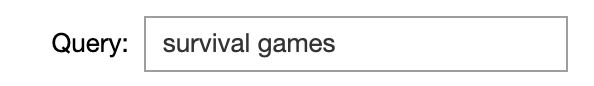

In [5]:
#That's how it looks if you install Ipwidgets 
from IPython.display import Image
Image(filename='/Users/paolaantonicoli/Desktop/q.png',width = 300, height = 200)



## 2.1 Conjunctive query
______


In [26]:
q = to_search.value
conj_df = f.df_query(q,df)
conj_df.sort_values('index')[['bookTitle','plot','URL']].reset_index(drop = True)

bookTitle  \
0                                    The Hunger Games   
1                                              Legend   
2                                           The Magus   
3                                    Code Name Verity   
4                                            Mud Vein   
5                                        And I Darken   
6                                                U-10   
7                                            Warcross   
8                              The Elephant Whisperer   
9                                 Dom Wars: Round Six   
10                                            Akarnae   
11  It's Called a Breakup Because It's Broken: The...   
12                                        Londonstani   
13                                     Altar of Bones   
14                                  The Camomile Lawn   
15                                       Aspho Fields   
16                                    The Water Knife   
17                             The Books of the South   
18                           Mass Effect: Retribution   
19                                           Immortal   
20                                   The Dark Calling   
21                                       Early Autumn   
22                             Cracks in the Pavement   
23                                     Deadly Alchemy   
24                                  Wolf in White Van   
25                                         The Warden   
26                                    A Spy by Nature   
27                                 Protection of Love   
28                                       Wicked Games   
29                                  Jacinto's Remnant   
30                                    Blood Awakening   
31                 Everything Beautiful Is Not Ruined   
32                                          Sanctuary   
33                                        Indian Hill   

                                                 plot  \
0   could survive wild every one make sure live se...   
1   western united state home republic nation perp...   
2   daring literary thriller rich eroticism suspen...   
3   oct th british spy plane crash nazi occupied f...   
4   reclusive novelist senna richards wake thirty ...   
5   one expects princess brutal lada dragwlya like...   
6   u survival kit might survive using activated u...   
7   million log every day warcross game way life o...   
8   south african conservationist lawrence anthony...   
9   gladiator inc adult toy company expands market...   
10  one step sixteen year old alexandra jennings w...   
11  must manual finding way back even rocking greg...   
12  jas trouble eighteen year old asian living lon...   
13  kill never drank altar bone cryptic dying word...   
14  behind large house fragrant camomile lawn stre...   
15  first time fan blockbuster gear war video game...   
16  american southwest nevada arizona california s...   
17  marching south ghastly battle tower charm blac...   
18  humanity reached star joining vast galactic co...   
19  new york time bestselling author kept reader e...   
20  new intrigue adventure stunning revelation fil...   
21  robert b parker brilliance simple dialogue spe...   
22  jekyll hyde st century watch psychopathic prof...   
23  choose life dy alchemist amelia rimos discover...   
24  welcome trace italian game strategy survival m...   
25  alice led normal life wake finding trapped sic...   
26  told long time ago make contact event emergenc...   
27  man trust man save unknown menace targeted ren...   
28  abby lewis never pictured survival game show e...   
29  based blockbuster xbox game stunning story men...   
30  dangerous game life blood survival marquis sil...   
31  ingrid traveled europe opera star mother margo...   
32  danger lurks shadow place brave tread warily j...   
33  michael talbot adventure first story ordinary ...   

                                                  UR

## 2.2 Conjunctive query & Ranking score
____

In [25]:
q = to_search.value
conj_df = f.df_query(q,df)
conj_df[['bookTitle','plot','URL','similarity']]

bookTitle  \
0                                          The Warden   
1                                    The Hunger Games   
2                                     Blood Awakening   
3                              The Books of the South   
4                                        Wicked Games   
5                                            Warcross   
6                                            Immortal   
7                                           The Magus   
8                                    Code Name Verity   
9                                            Mud Vein   
10                                  Wolf in White Van   
11                                  Jacinto's Remnant   
12                                   The Dark Calling   
13                                             Legend   
14                                     Altar of Bones   
15                                       Early Autumn   
16                 Everything Beautiful Is Not Ruined   
17                                     Deadly Alchemy   
18                                    The Water Knife   
19                                  The Camomile Lawn   
20  It's Called a Breakup Because It's Broken: The...   
21                                          Sanctuary   
22                                            Akarnae   
23                             The Elephant Whisperer   
24                                               U-10   
25                           Mass Effect: Retribution   
26                                       Aspho Fields   
27                                Dom Wars: Round Six   
28                                        Indian Hill   
29                                 Protection of Love   
30                                        Londonstani   
31                                       And I Darken   
32                                    A Spy by Nature   
33                             Cracks in the Pavement   

                                                 plot  \
0   alice led normal life wake finding trapped sic...   
1   could survive wild every one make sure live se...   
2   dangerous game life blood survival marquis sil...   
3   marching south ghastly battle tower charm blac...   
4   abby lewis never pictured survival game show e...   
5   million log every day warcross game way life o...   
6   new york time bestselling author kept reader e...   
7   daring literary thriller rich eroticism suspen...   
8   oct th british spy plane crash nazi occupied f...   
9   reclusive novelist senna richards wake thirty ...   
10  welcome trace italian game strategy survival m...   
11  based blockbuster xbox game stunning story men...   
12  new intrigue adventure stunning revelation fil...   
13  western united state home republic nation perp...   
14  kill never drank altar bone cryptic dying word...   
15  robert b parker brilliance simple dialogue spe...   
16  ingrid traveled europe opera star mother margo...   
17  choose life dy alchemist amelia rimos discover...   
18  american southwest nevada arizona california s...   
19  behind large house fragrant camomile lawn stre...   
20  must manual finding way back even rocking greg...   
21  danger lurks shadow place brave tread warily j...   
22  one step sixteen year old alexandra jennings w...   
23  south african conservationist lawrence anthony...   
24  u survival kit might survive using activated u...   
25  humanity reached star joining vast galactic co...   
26  first time fan blockbuster gear war video game...   
27  gladiator inc adult toy company expands market...   
28  michael talbot adventure first story ordinary ...   
29  man trust man save unknown menace targeted ren...   
30  jas trouble eighteen year old asian living lon...   
31  one expects princess brutal lada dragwlya like...   
32  told long time ago make contact event emergenc...   
33  jekyll hyde st century watch psychopathic prof...   

                                                  UR

> # 3. Define a New score!

In this part of the assignment we were required to build a new score in order to give a priority order to the result of the query,based also on other features beside the plot.

For this purpose we built a class <code>Book</code> and implemented a function that returns a weighted average between:

* The score the book gained by **similarity**

* The similarity score given for the **synonimus** of the query contained in the plot: we considered the sum of the tf-idf of the couples (syns, book) and divided it by the lenght of the list of synonimus and the norm of the document (how many words are present in it)

* The score given according to  importance of the **author** of the book (how many books written by the same author are present in the dataframe): we build a dictionary in wich every autuor is associated to the number of book he write that are present in the dataframe, divided by the total number of books.

* The score given according to the presence of the query word in the **book title**: We used the Jaccard Distance

* The score given according to the number of **reviews** and **rantings** : We used a logaritmic scale both for reviwes and ratings,  in order to avoid giving too much importance to the highest reviewd/rated books, levereging the scores. Then we divided it for the norm of the vector we built in this way, in order to normalize the scores.

* The score given according to the **setting** : We considered if the query matches the place were the book is setted, for computing this score we considered the ratio between the cardinality of the intersection between the query words and the place words, and the cardinality of the setting list.

The weight to give to each feature is selected by the user.




In [9]:
to_search = f.ask_query()


Text(value='', description='Query:', placeholder='Insert your query here')

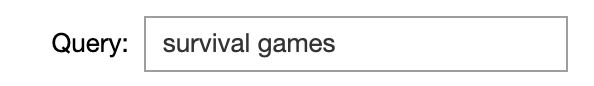

In [7]:
#That's how it looks if you install Ipwidgets 

from IPython.display import Image
Image(filename='/Users/paolaantonicoli/Desktop/q.png',width = 300, height = 200)

#otherwise just modify the input

In [10]:
importance = f.collect_weights()

FloatSlider(value=7.5, continuous_update=False, description='score', max=10.0, readout_format='.1f')

FloatSlider(value=7.5, continuous_update=False, description='author', max=10.0, readout_format='.1f')

FloatSlider(value=7.5, continuous_update=False, description='synon', max=10.0, readout_format='.1f')

FloatSlider(value=7.5, continuous_update=False, description='title', max=10.0, readout_format='.1f')

FloatSlider(value=7.5, continuous_update=False, description='reviews & rating', max=10.0, readout_format='.1f'…

FloatSlider(value=7.5, continuous_update=False, description='palce', max=10.0, readout_format='.1f')

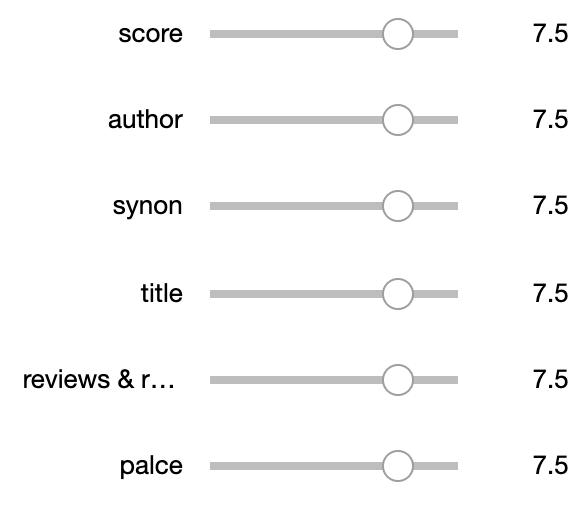

In [8]:
#That's how it looks if you install Ipwidgets 

from IPython.display import Image
Image(filename='/Users/paolaantonicoli/Desktop/T.png',width = 300, height = 200)


In [35]:
weights = [s.value/60 for s in importance]
k = 20 
q = to_search.value
top_k_df = f.top_k_df(q,weights,df,k)

In [36]:
top_k_df

bookTitle                                               plot  \
0         The Hunger Games  could survive wild every one make sure live se...   
1             Wicked Games  abby lewis never pictured survival game show e...   
2                 Immortal  new york time bestselling author kept reader e...   
3                 Warcross  million log every day warcross game way life o...   
4               The Warden  alice led normal life wake finding trapped sic...   
5                   Legend  western united state home republic nation perp...   
6         The Dark Calling  new intrigue adventure stunning revelation fil...   
7   The Books of the South  marching south ghastly battle tower charm blac...   
8                The Magus  daring literary thriller rich eroticism suspen...   
9         Code Name Verity  oct th british spy plane crash nazi occupied f...   
10         Blood Awakening  dangerous game life blood survival marquis sil...   
11                Mud Vein  reclusive novelist senna richards wake thirty ...   
12       Wolf in White Van  welcome trace italian game strategy survival m...   
13     Dom Wars: Round Six  gladiator inc adult toy company expands market...   
14       Jacinto's Remnant  based blockbuster xbox game stunning story men...   
15            And I Darken  one expects princess brutal lada dragwlya like...   
16         The Water Knife  american southwest nevada arizona california s...   
17                 Akarnae  one step sixteen year old alexandra jennings w...   
18            Early Autumn  robert b parker brilliance simple dialogue spe...   
19  The Elephant Whisperer  south african conservationist lawrence anthony...   

                                                  URL  similarity  my_score  
0   https://www.goodreads.com/book/show/2767052-th...    0.308679  0.117913  
1   https://www.goodreads.com/book/show/10719342-w...    0.238054  0.099127  
2   https://www.goodreads.com/book/show/18492859-i...    0.215083  0.072018  
3   https://www.goodreads.com/book/show/41014903-w...    0.224513  0.067638  
4   https://www.goodreads.com/book/show/33818812-t...    0.431544  0.065111  
5   https://www.goodreads.com/book/show/9275658-le...    0.139448  0.059549  
6   https://www.goodreads.com/book/show/31453592-t...    0.146374  0.058982  
7   https://www.goodreads.com/book/show/2365730.Th...    0.268329  0.056638  
8   https://www.goodreads.com/book/show/16286.The_...    0.198115  0.055974  
9   https://www.goodreads.com/book/show/11925514-c...    0.183066  0.054983  
10  https://www.goodreads.com/book/show/11030236-b...    0.279742  0.054458  
11  https://www.goodreads.com/book/show/18246727-m...    0.172326  0.052468  
12  https://www.goodreads.com/book/show/20575425-w...    0.166180  0.047028  
13  https://www.goodreads.com/book/show/22912730-d...    0.086547  0.043358  
14  https://www.goodreads.com/book/show/6276888-ja...    0.160021  0.043060  
15  https://www.goodreads.com/book/show/27190613-a...    0.074718  0.042614  
16  https://www.goodreads.com/book/show/23209924-t...    0.116401  0.042349  
17  https://www.goodreads.com/book/show/23569787-a...    0.108836  0.042044  
18  https://www.goodreads.com/book/show/69625.Earl...    0.120819  0.040276  
19  https://www.goodreads.com/book/show/6375561-th...    0.108260  0.039678

> # 4. Make a nice visualization!

In order to give a visualization of the cumulative number of pages of a serie, since the first book published, we had to update the dataframe splitting the Serie's Name and the Serie's number (which is in format <code>SerieName #SerieNumber</code>).
Furthermore we removed the in-between books (Those like 1.5) since most of the time they are not coherent with the year of publication of the first book.

In [3]:
df_serie = f.get_df_serie(df)
df_serie

index                                          bookTitle  \
32       32                               Anne of Green Gables   
593     593                                    Anne of Avonlea   
1100   1100                                 Anne of the Island   
2656   2656                             Anne's House of Dreams   
7458   7458                                     Rainbow Valley   
2914   2914                                 Rilla of Ingleside   
6361   6361                              Anne of Windy Poplars   
7266   7266                                  Anne of Ingleside   
21       21                                          Divergent   
151     151                                          Insurgent   
333     333                                          Allegiant   
37       37                                            Dracula   
29       29                                       Ender's Game   
584     584                               Speaker for the Dead   
1594   1594                                           Xenocide   
2422   2422                               Children of the Mind   
31       31              Harry Potter and the Sorcerer's Stone   
125     125            Harry Potter and the Chamber of Secrets   
91       91           Harry Potter and the Prisoner of Azkaban   
102     102                Harry Potter and the Goblet of Fire   
1         1          Harry Potter and the Order of the Phoenix   
105     105             Harry Potter and the Half-Blood Prince   
70       70               Harry Potter and the Deathly Hallows   
1308   1308  Harry Potter and the Cursed Child: Parts One a...   
515     515                                    Angels & Demons   
14       14                                  The Da Vinci Code   
451     451                                    The Lost Symbol   
660     660                                            Inferno   
2104   2104                                             Origin   
11       11               The Hitchhiker's Guide to the Galaxy   
787     787          The Restaurant at the End of the Universe   
1002   1002                  Life, the Universe and Everything   
1662   1662               So Long, and Thanks for All the Fish   
2046   2046                                    Mostly Harmless   
0         0                                   The Hunger Games   
222     222                                      Catching Fire   
321     321                                         Mockingjay   
5555   5555                 The Ballad of Songbirds and Snakes   
28       28                                      City of Bones   
684     684                                      City of Ashes   
513     513                                      City of Glass   
238     238                              City of Fallen Angels   
305     305                                 City of Lost Souls   
410     410                              City of Heavenly Fire   
4         4                                           Twilight   
1173   1173                                           New Moon   
1088   1088                                            Eclipse   
1092   1092                                      Breaking Dawn   
7391   7391                                       Midnight Sun   

                                      Serie Number  number_of_pages  \
32                    Anne of Green Gables       1              320   
593                   Anne of Green Gables       2              304   
1100                  Anne of Green Gables       3              243   
2656                  Anne of Green Gables       5              227   
7458                  Anne of Green Gables       7              225   
2914                  Anne of Green Gables       8              277   
6361                  Anne of Green Gables       4              288   
7266                  Anne of Green Gables       6              274   
21                               Divergent       1              48

Here is our plot, is dynamic (For visualize it well first go to Year 31 and then press *reset axis* 🏠)

In [15]:
f.serie_plot(df_serie)
#missing if you don't install plotly

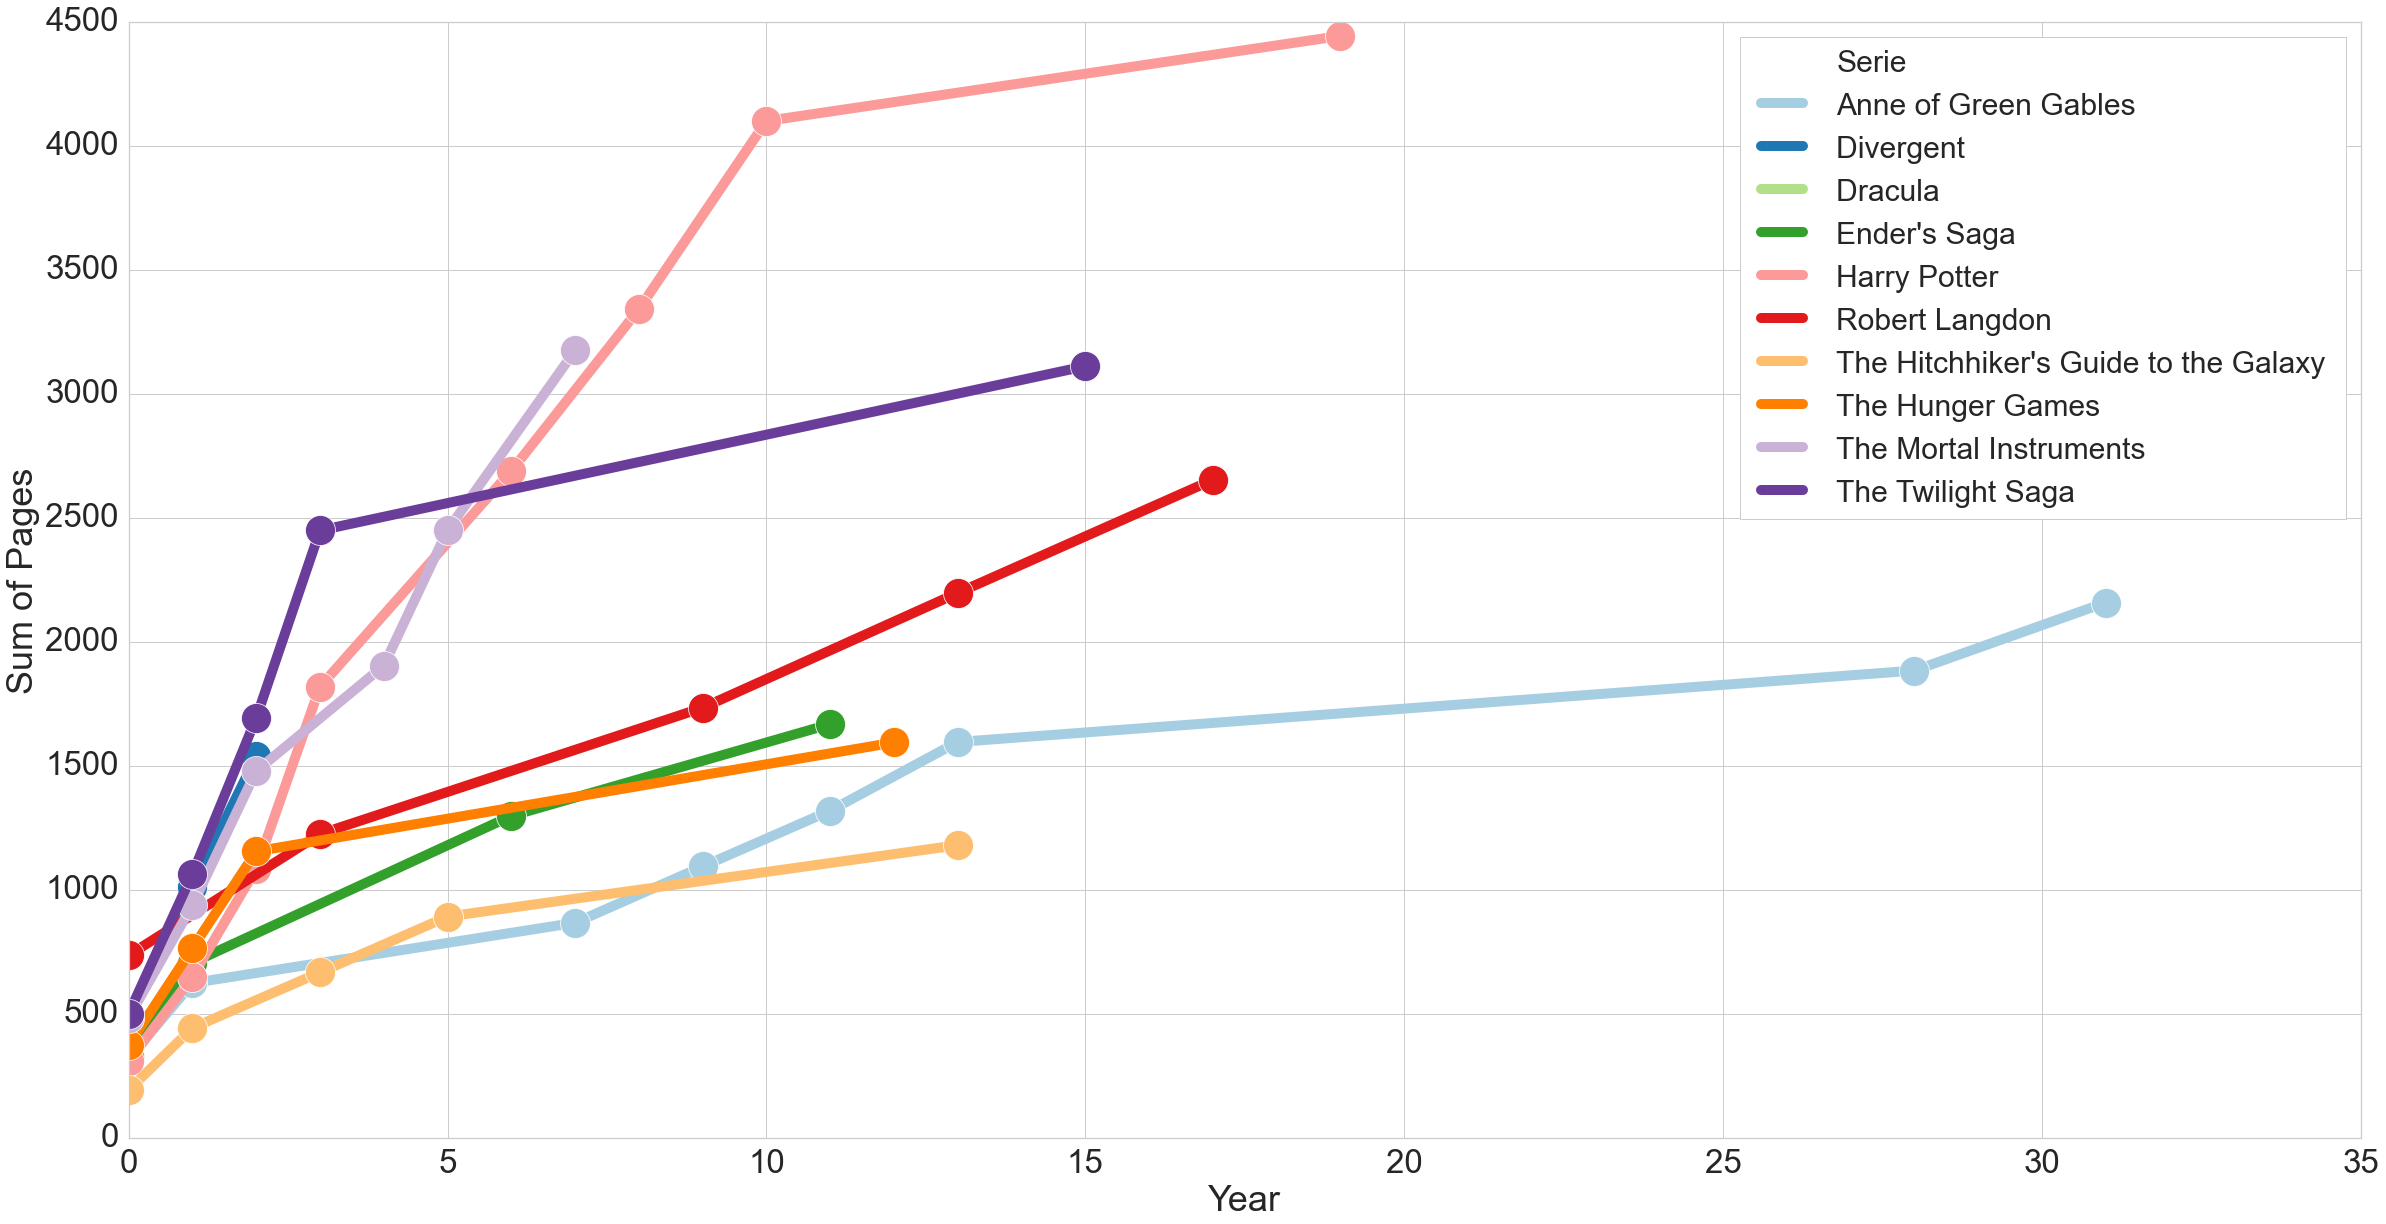

In [4]:
f.static_serie_plot(df_serie)

> # 5.Algoritmic Question

#### 1. Write a recursive program that, given a string, computes the length of the subsequence of maximum length that is in alphabetical order.

In [4]:
#Recursive Program
def maxord(s,i = -1):    
    if i == -1:
        return max([maxord(s,i) for i in range(len(s))])
    l=[maxord(s,j) for j in range(i) if s[j]<s[i]]
    if l==[]:
        return 1
    else:
        
        return 1+max(l)

Try some examples.

In [5]:
maxord('CADFECEILGJHABNOFPSTIRYOEABILCNR')

11

Are the examples of short strings correct?

In [7]:
maxord('ABCTQEF')

5

In [8]:
maxord('PERAFBBLCHDRQEGF')

6

Can you find examples that your algorithm does not terminate in reasonable time

In [9]:
%%time
maxord('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

CPU times: user 40.5 s, sys: 38.2 ms, total: 40.6 s
Wall time: 40.6 s


26

We tried also <code>maxord('ABCDEFGHIJKLMNOPQRSTUVWXYZABCDEFGHIJKLMNOPQRSTUVWXYZ')</code> but never gave an output.
Indeed the worst case for this algorithm is to have as input a perfectly ordered string: in this case there is a recursive call every time <code>s[i] \< s[j]</code>, hence it has to recursively call itself for every string <code>s[:i] i = 0, ... , j-1</code> for all <code>j =1,..,n-1</code>, wich means to have $2^{(n-1)}$ calls.
  

#### 2.Show that the running time of the algorithm is exponential.

The running time complexity of this algorithm is $O(2^n)$.
First we notice that, in the worst case (a perfectly ordered string 'ABC...Z'), in wich:

<code>s[j] \< s[i] j =0,...,i-1</code>  we have to compute <code>maxord(s,j)</code> for <code>i-1</code>  strings.

Therefore in this case, said $n$ the lenght of the string:
$$T(n) = \sum_{j=1}^{n-1} T(n-i) + c\bullet n $$
    
where the added $c\bullet n$ is considered the computational time for the <code>max()</code> operation, which we know to be linear.

Furthermore, if we consider that: 
    $$T(n-1) = \sum_{j=1}^{n-2} T(n-i) + c\bullet (n-1)$$
and:
    $$T(n) = T(n-1)+ \sum_{j=1}^{n-2} T(n-i) + c\bullet n $$
    
we get:
    $$T(n) = T(n-1)+ T(n-1)+ c\bullet n -c\bullet(n-1)=2T(n-1)+c $$
    
So:
    $$T(n) > 2 T(n-1)>4 T(n-2) >...> 2^l T(n-l) $$
    
Therefore the computational time for the recursive algorithm is $O(2^n)$

##### The running time of the worst cases for $n=1,...26$
On the left, the time that a machine takes to give as an output the solution.

On the right, the function $2^n$

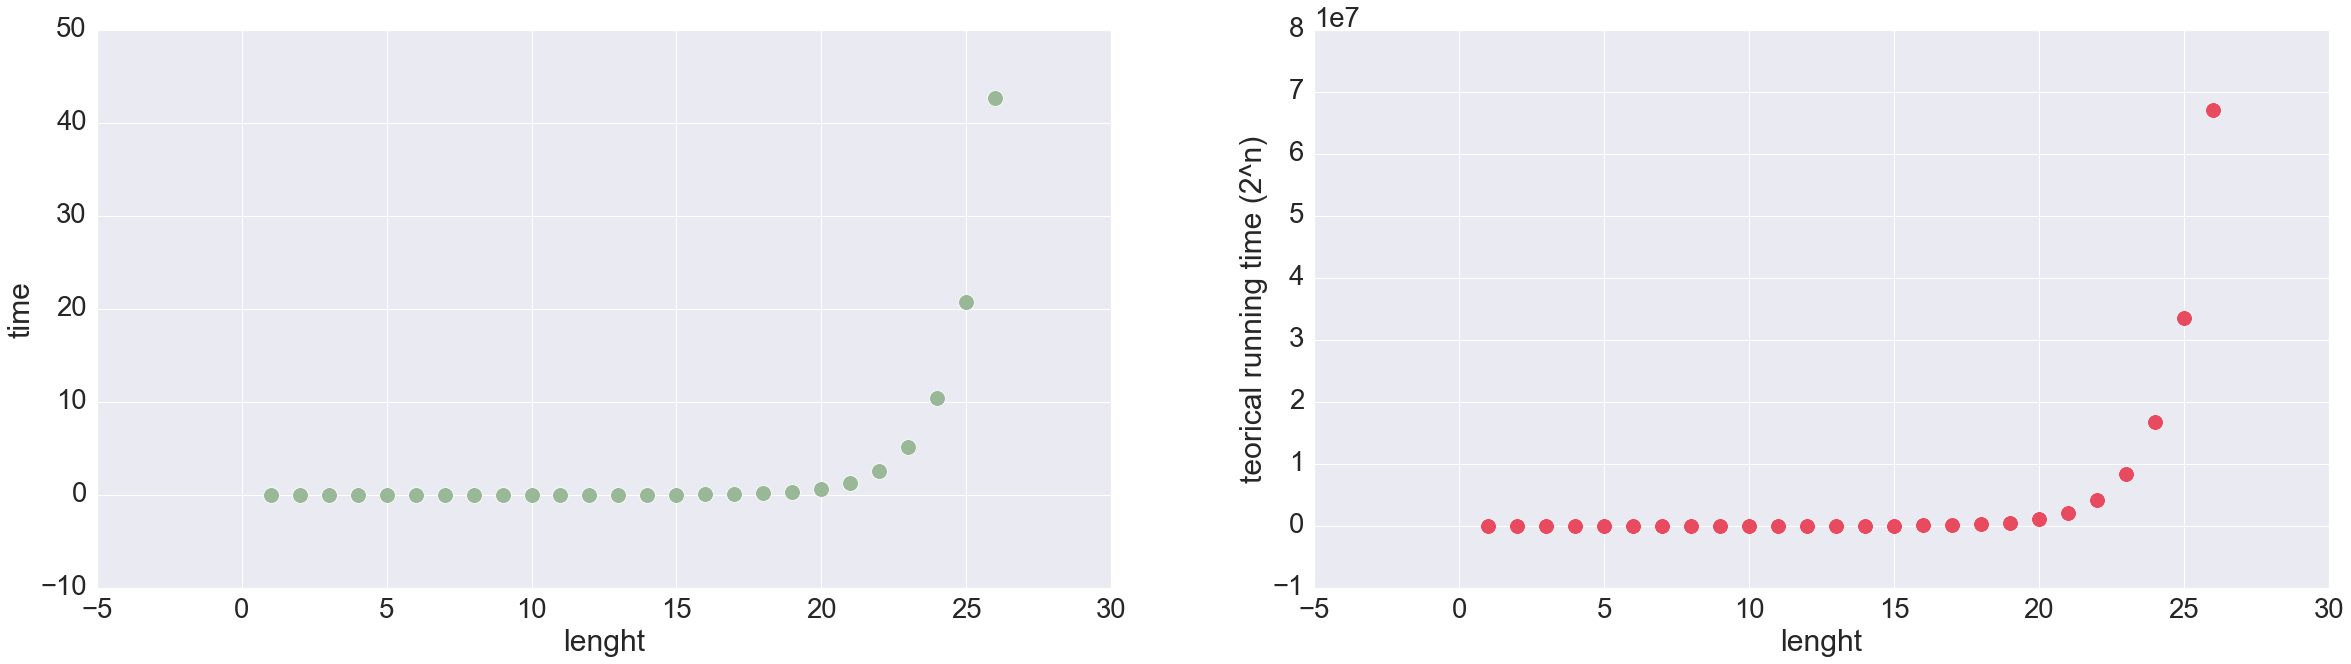

In [3]:
alphabet = [ chr(ord('@')+i) for i in range(1,27)]
strings = [''.join(alphabet[:i]) for i in range(1,27)]

f.plot_maxord_runningtime(strings)

#### 3. Write a program that computes the length of the subsequence of maximum length, using dynamic programming.

In [59]:
#Dynamic Program
def maxord_d(s,i = -1, m = []):    
    if i==-1:
        return max([maxord_d(s,i=i,m=[0]*len(s)) for i in range(len(s))])
    if m[i]!= 0:
        return m[i]
    s = s[:i+1]
    l=[j for j in range(i) if s[j]<s[i]]
    if l==[]:
        m[i]=1
        return 1
    else:
       
        m[i]=max(m[j] for j in range(i) if s[j]<s[i])+1 
        return 1+max(maxord_d(s,j,m) for j in l)

#### 4. What is its runtime complexity?

The runtime complexity is $O(n^2)$ , indeed in this case we have to compute the maximum value between $i$ elements, for $i =1 ,..., n-1$ , while the other operations (updating or getting the value of <code>m</code> ) require constant time.

Since this operation requires $O(i)$ , we get $\sum_{i=1}^{n-1} i = \frac{n(n-1)}{2}$ , that is $O(n^2)$


##### The running time of the worst cases for $n=1,...26$
On the left, the time that a machine takes to give as an output the solution.

On the right, the function $n^2$

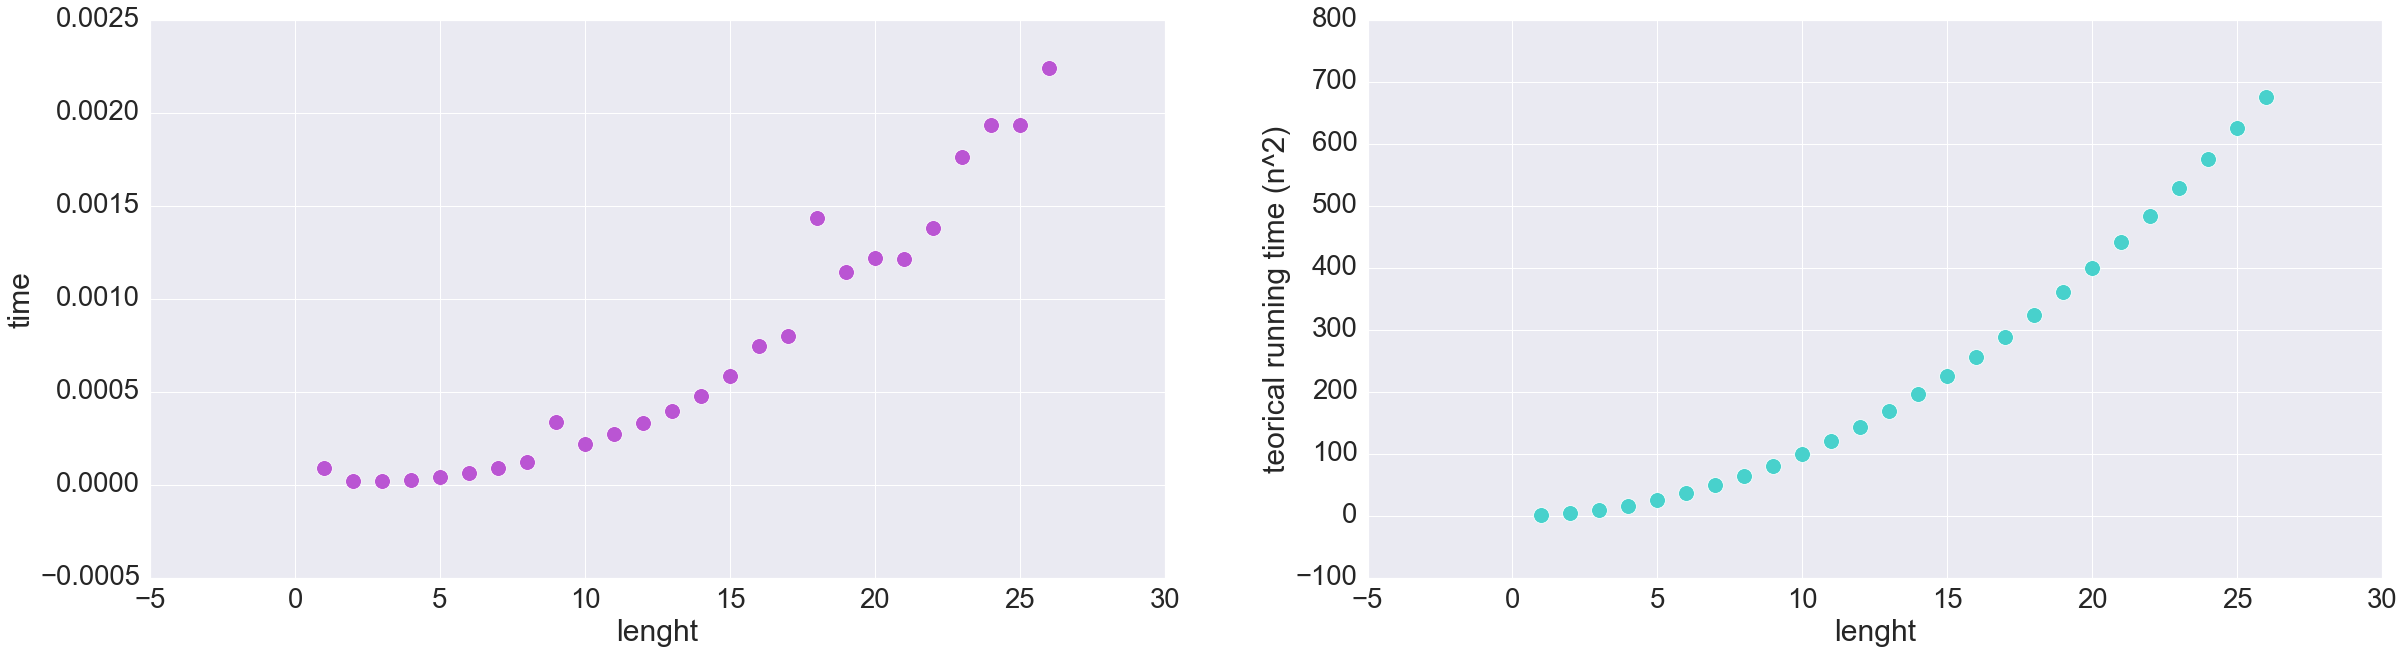

In [61]:
alphabet = [ chr(ord('@')+i) for i in range(1,27)]
strings = [''.join(alphabet[:i]) for i in range(1,27)]
f.plot_maxord_dynamic_runningtime(strings)

#### 5. Proof of correctness

This problem can be apporached topologically, as the problem of finding the depth of a rooted tree in which a node $s[j]$ is parent of a vertex $s[i]$ if $j = max\{1, ..., i-1 |s[j]<s[i]\}$.
Therefore, the level of a node $s[j]$ (named $l[j]$)corresponds to the maximum increasing subsequence of s that ends with $s[j]$.
By definition of parent and child in a tree, $l[i] = 1+l[j]$
Finding the depth of a tree corresponds to find the maximum ordered subsequence within the string s.

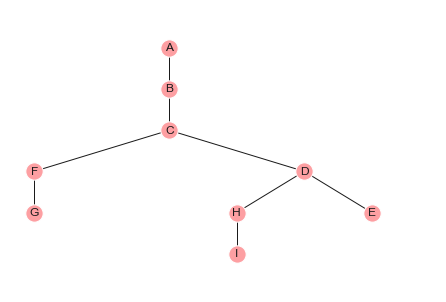

In [43]:
s = 'ABCFGDHIEC'
vertex = list(s)
G = nx.Graph()
G.add_nodes_from(vertex)

edges = []
for i in range(len(s)):
    if [j for j in range(i) if s[j]<s[i]]!= []:
        j = max([j for j in range(i) if s[j]<s[i]])

        edges +=[(s[i],s[j])]

G.add_edges_from(edges)
nx.draw(G, with_labels=True,node_color = '#FD9FA2')
